### A. MODEL BUILDING PROCESS
#### 1) Split data into training and test sets
#### 2) Instantiate the baseline model
#### 3) Train baseline model
#### 4) Model prediction using the test data
#### 5) Measure baseline model performance
#### 6) Hyperparameter Tuning (i.e. Optimizing the baseline model)
#### 7) Re-evaluate model performance

### B. ML ALGORITHM - RANDOM FOREST (RF)
#### - The application of RF was made based on the following factors:
####    - It can handle thousands of input variables without variable deletion.
####    - It runs efficiently on a large dataset
####    - It is a SIMPLE model - flexible and easy to use that produces , even without hyper-parameter tuning, a great result most of the time

## Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.externals import joblib

from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

import sys
print (sys.version)
%matplotlib inline

3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]


## (1) Split data into training and test sets

In [2]:
train = pd.read_csv("./data/digits.csv")
features = train.columns[1:]
X = train[features]
y = train['label']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## (2) Make instance of the baseline model

In [4]:
clf_rf = RandomForestClassifier()

## (3) Train the baseline model on the data, storing the information learned from the data
#### -learning the relationship between X (digits) and y (labels)

In [5]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## (4) Predict the labels of new data (test set)
#### - using the information the model learned during the model training process

In [6]:
y_pred_rf = clf_rf.predict(X_test)

## (5) Measure baseline model performance

### - What is the accuracy of the baseline model on the test set?
### 5.1. Baseline Model Accuracy

In [7]:
acc_rf = accuracy_score(y_test, y_pred_rf)
print ("Model accuracy: ",acc_rf)

Model accuracy:  0.9045


### - How do we quantify the costs of the model being wrong i.e. quantify that % inaccuracy (1 - accuracy) which is making the model wrong
### 5.2. Confusion Matrix

In [8]:
cm = metrics.confusion_matrix(y_test, y_pred_rf)

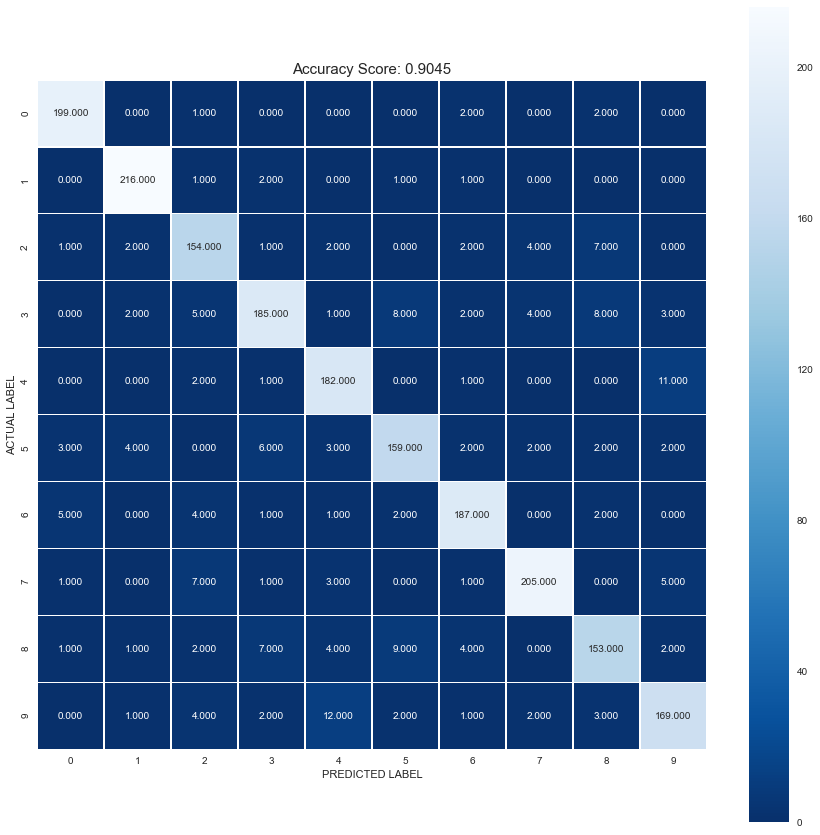

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('ACTUAL LABEL');
plt.xlabel('PREDICTED LABEL');
all_sample_title = 'Accuracy Score: {0}'.format(acc_rf)
plt.title(all_sample_title, size = 15);

### 5.2.a. Classification Metrics

In [10]:
##### DEFINITION #####
# Precision = TP / (TP + FP)
#           = fraction of predicted positive events that are actually positive 
# Recall = TP / (TP + FN)
#           = fraction of positive events that were predicted correctly
# F1-score = [2 * (Precision * Recall)] / (Precision + Recall)
#           = weighted average of the precision and recall
# Support = the number of occurences of each class in test set
######################


print (classification_report(y_test, y_pred_rf))

             precision    recall  f1-score   support

          0       0.95      0.98      0.96       204
          1       0.96      0.98      0.97       221
          2       0.86      0.89      0.87       173
          3       0.90      0.85      0.87       218
          4       0.88      0.92      0.90       197
          5       0.88      0.87      0.87       183
          6       0.92      0.93      0.92       202
          7       0.94      0.92      0.93       223
          8       0.86      0.84      0.85       183
          9       0.88      0.86      0.87       196

avg / total       0.90      0.90      0.90      2000



### - How do we verify if the baseline model has learning as much as it can about the data? (i.e. generalize to new data)
### - Ideal Learning Curve:
###   - model that generalizes to new data // testing and training learning curves converge at similar values // smaller the gap, the better the model generalizes
### 5.3. Learning Curves
- a graph that compares the performance of a model on training and testing data over a varying number of training instances

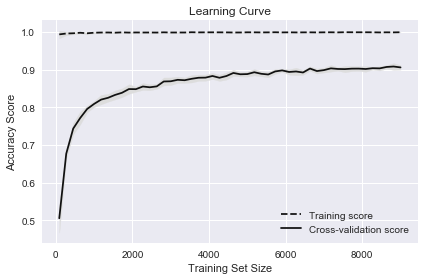

In [11]:
# Create 10-fold cross-validation (CV) training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(clf_rf, 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### 5.3. Analysis

#### - 1) Training score (dash-line) is at its maximum regardless of training examples (verify if overfitting?)
#### - 2) Cross-validation score increases over time
#### - 3) Huge gap between cross-validation score and training score indicates high variance scenario (reduce complexity of the model or gather more data)
#### - 4) Since there is limited data provided, we will proceed to optimizing the baseline model to verify if:
####        - The baseline model really overfits;
####        - Determine if there will be reduction in variance. Since the number of trees used in the parameters of the model is set to default 10, we need to determine the optimal number of deep, uncorrelated trees to grow to reduce the variance)

## (6) Hyperparameter Tuning
## NOTE: This will only be run once.

### 6.1. Look at parameters of the baseline model

In [13]:
# ## n_estimators = number of trees in the forest
# ## max_features = max number of features considered for splitting a node
# ## max_depth = max number of levels in each decision tree
# ## min_samples_split = min number of data points placed in a node before the node is split
# ## min_samples_leaf = min number of data points allowed in a leaf node
# ## bootstrap = method for sampling data points (with or without replacement)

# pprint(clf_rf.get_params())

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


### 6.2. Random Hyperparameter Grid
### - create a parameter grid to sample during fitting

In [14]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


### 6.3. Random Search Training
### - instantiate the random search and fit the model

In [15]:
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = clf_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2,
#                                random_state=42, n_jobs = -1)

In [16]:
# # Fit the random search model
# rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 56.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 115.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [17]:
# # view the best parameters from fitting the random search
# rf_random.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

### 6.4. Evaluate Random Search
### - compare base model with the best random search model

In [53]:
# def evaluate(model, test_features, test_labels):
#     predictions = model.predict(test_features)
#     errors = abs(predictions - test_labels)
#     y_pred = model.predict(test_features)
#     accuracy = accuracy_score(test_labels, y_pred)
#     print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}'.format(accuracy))
    
#     return accuracy

# base_model = clf_rf
# base_model.fit(X_train, y_train)
# base_accuracy = evaluate(base_model, X_test, y_test)

# best_random = rf_random.best_estimator_
# random_accuracy = evaluate(best_random, X_test, y_test)

# print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.3630 degrees.
Accuracy = 0.90
Model Performance
Average Error: 0.1750 degrees.
Accuracy = 0.95
Improvement of 5.88%.


### 6.5. Save / load the model to disk

In [55]:
##joblib.dump(best_random, './model/20181028_best_random_model.sav')

['./model/20181028_best_random_model.sav']

## (7) Re-evaluate model performance on the test set

## NOTE: This will only be run once.

### 7.1. Model Accuracy

In [4]:
# clf_rf = RandomForestClassifier(n_estimators=1400,
#                                 min_samples_split=2,
#                                 min_samples_leaf=1,
#                                 max_features='auto',
#                                 max_depth=40,bootstrap=False)

# clf_rf.fit(X_train, y_train)
# y_pred_rf = clf_rf.predict(X_test)
# acc_rf = accuracy_score(y_test, y_pred_rf)
# print ("Model accuracy: ",acc_rf)

Model accuracy:  0.9565


### 7.2. Confusion Matrix

In [5]:
# cm = metrics.confusion_matrix(y_test, y_pred_rf)

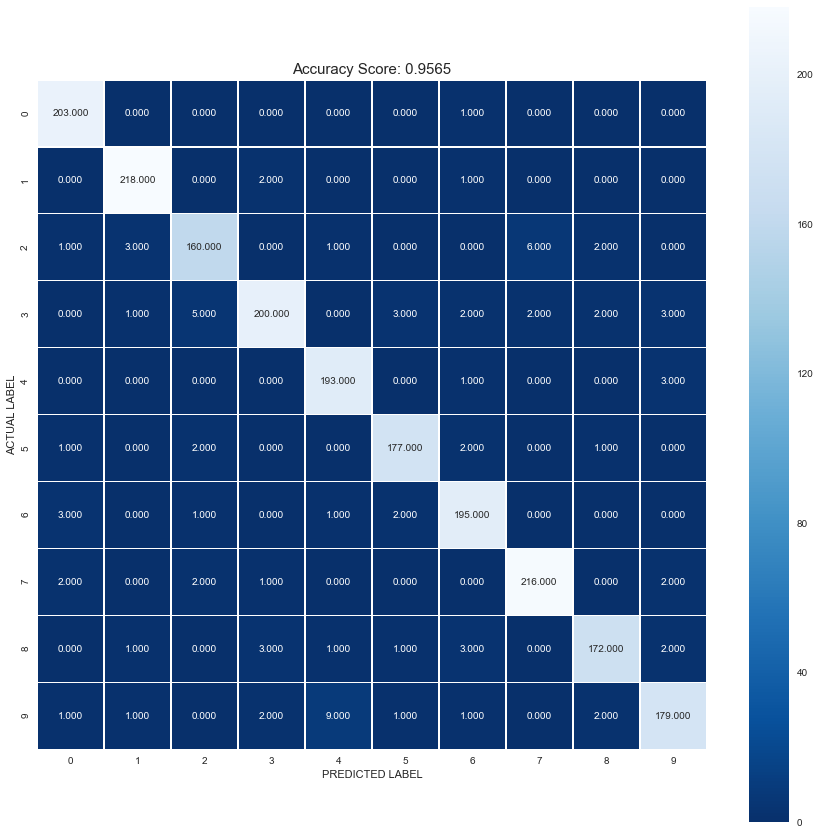

In [6]:
# plt.figure(figsize=(15,15))
# sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
# plt.ylabel('ACTUAL LABEL');
# plt.xlabel('PREDICTED LABEL');
# all_sample_title = 'Accuracy Score: {0}'.format(acc_rf)
# plt.title(all_sample_title, size = 15);

### 7.3. Classification Metrics

In [7]:
# ##### DEFINITION #####
# # Precision = TP / (TP + FP)
# #           = fraction of predicted positive events that are actually positive 
# # Recall = TP / (TP + FN)
# #           = fraction of positive events that were predicted correctly
# # F1-score = [2 * (Precision * Recall)] / (Precision + Recall)
# #           = weighted average of the precision and recall
# # Support = the number of occurences of each class in test set
# ######################


# print (classification_report(y_test, y_pred_rf))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98       204
          1       0.97      0.99      0.98       221
          2       0.94      0.92      0.93       173
          3       0.96      0.92      0.94       218
          4       0.94      0.98      0.96       197
          5       0.96      0.97      0.96       183
          6       0.95      0.97      0.96       202
          7       0.96      0.97      0.97       223
          8       0.96      0.94      0.95       183
          9       0.95      0.91      0.93       196

avg / total       0.96      0.96      0.96      2000



### 7.4. Learning Curves

In [ ]:
# # Create 10-fold cross-validation (CV) training and test scores for various training set sizes
# train_sizes, train_scores, test_scores = learning_curve(clf_rf, 
#                                                         X, 
#                                                         y,
#                                                         # Number of folds in cross-validation
#                                                         cv=10,
#                                                         # Evaluation metric
#                                                         scoring='accuracy',
#                                                         # Use all computer cores
#                                                         n_jobs=-1, 
#                                                         # 50 different sizes of the training set
#                                                         train_sizes=np.linspace(0.01, 1.0, 50))

# # Create means and standard deviations of training set scores
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)

# # Create means and standard deviations of test set scores
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

# # Draw lines
# plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
# plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# # Draw bands
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# # Create plot
# plt.title("Learning Curve")
# plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
# plt.tight_layout()
# plt.show()

## (8) Model Persistence

In [4]:
#load_model = joblib.load('./model/20181028_best_random_model.sav')